In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [5]:
import pickle

import numpy as np

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [6]:
with open('preprocessed_emojis.pkl', 'rb') as f:
    preprocessed_emojis = pickle.load(f)

print (f'Imagenes cargadas: {len(preprocessed_emojis)}')

# Organiza los datos en matrices numpy
labels = ['Angry', 'Happy', 'Poo', 'Sad', 'Surprised']

X = np.array([img.flatten() for img, _ in preprocessed_emojis])
y = np.array([labels.index(label) for _, label in preprocessed_emojis])

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

Imagenes cargadas: 2530
Forma de X: (2530, 1024)
Forma de y: (2530,)


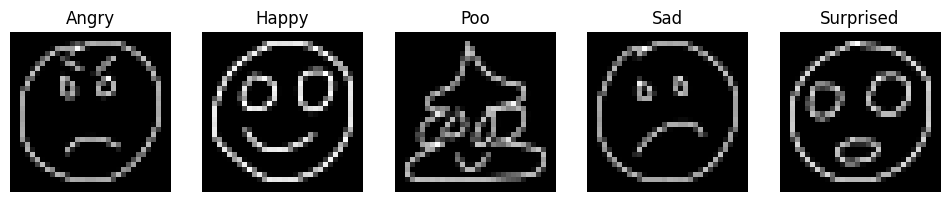

In [7]:
# Muestra una imagen de cada categoría preprocesada
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for i, label in enumerate(labels):
    for img, img_label in preprocessed_emojis:
        if img_label == label:
            plt.subplot(1, 5, i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(label)
            plt.axis('off')
            break

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
y_train_cat = to_categorical(y_train, num_classes=len(labels))
y_test_cat = to_categorical(y_test, num_classes=len(labels))

print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train_cat.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test_cat.shape)

Forma de X_train: (2024, 1024)
Forma de y_train: (2024, 5)
Forma de X_test: (506, 1024)
Forma de y_test: (506, 5)


In [9]:
def create_mlp(input_dim, num_classes):
    model = Sequential()
    
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [10]:
model = create_mlp(input_dim=X_train.shape[1], num_classes=5)
model.summary()
model.fit(X_train, y_train_cat, epochs=10, batch_size=16, validation_split=0.2)



c:\Users\karla\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,781 (546.02 KB)

 Trainable params: 139,781 (546.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5065 - loss: 7.3003 - val_accuracy: 0.6099 - val_loss: 2.7664
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7227 - loss: 1.3497 - val_accuracy: 0.5827 - val_loss: 3.1112
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8166 - loss: 0.7010 - val_accuracy: 0.6543 - val_loss: 2.1788
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8771 - loss: 0.4074 - val_accuracy: 0.6963 - val_loss: 1.9443
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9104 - loss: 0.2816 - val_accuracy: 0.7062 - val_loss: 1.7872
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9327 - loss: 0.1978 - val_accuracy: 0.6790 - val_loss: 1.9449
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9623 - loss: 0.1309 - val_accuracy: 0.7210 - val_loss: 1.8250
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9160 - loss: 0.3115 - val_accuracy: 0.